 Classification - Nearest Neighbors

Name :VARAHA KRISHNA ARANGI

Firsty, we need to import all the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve,auc


Initially, we loaded the KNN_dataset into the pandas data frame using read.csv

In [2]:
# Read the CSV file into a Pandas Dataframe
data = pd.read_csv('dataset_KNN.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

  <b> Before Cleaning   </b>

 Correlation Coefficient, write the observations from heat maps drawn  

Correlation heatmaps are graphical representations of the strength of correlations between numerical data. Correlation plots are used to determine which variables are related to one another and how strong this relationship is.
In this grid-like structure shown below, we can see how one component like Pregnancies is
related to Glucose. From the last row, second column we can see the correlation among them is
0.49.

Pearson Correlation Matrix


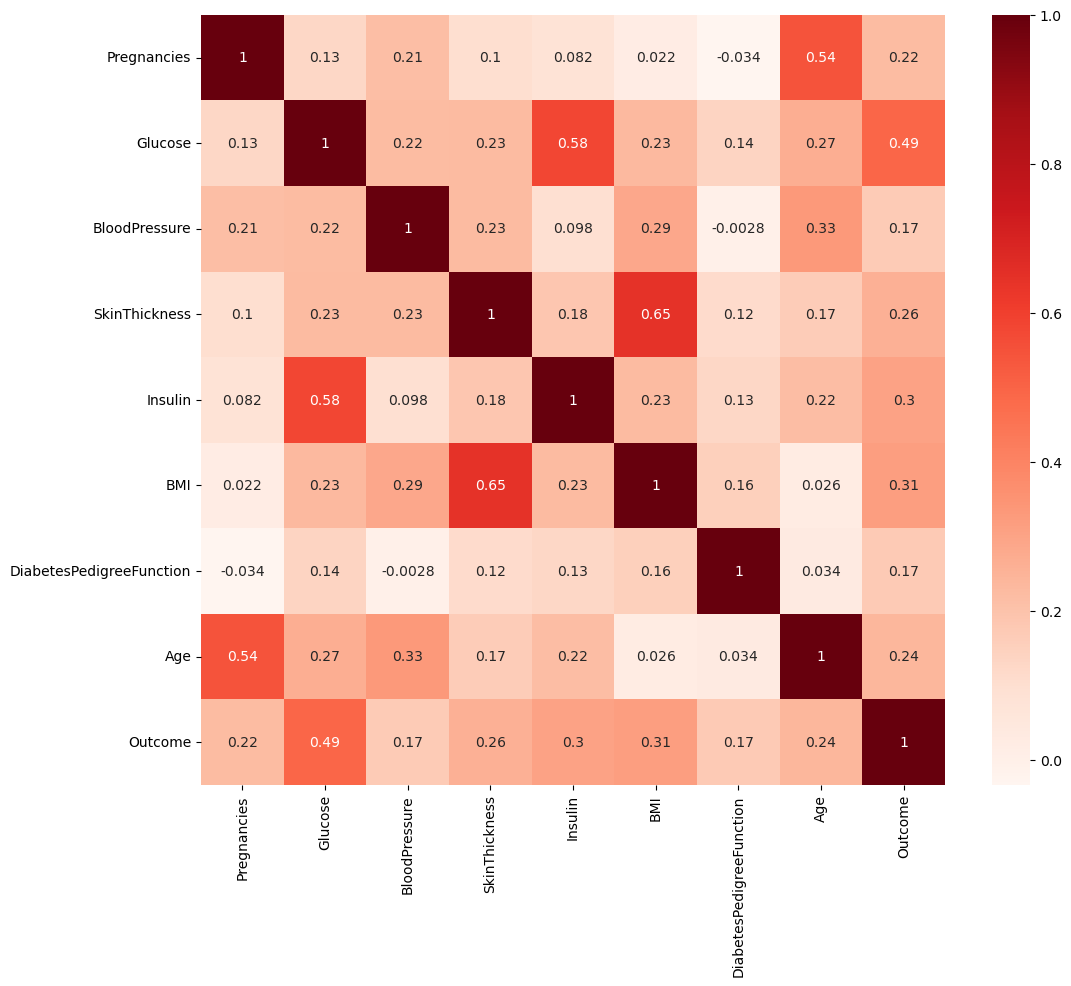

In [3]:
# Using Pearson Correlation to find most infuential attributes
print("Pearson Correlation Matrix")
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

  <b> Data Pre-processing   </b>

We have updated the NAN values in our dataset with mean as we have columns such as age which can never have zero value as nobody is of age 0, and Blood pressure can never be zero for a living human being and the same is the case with skin thickness. So, it is more meaningful to have the values replaced with the mean value. 



In [4]:
print("Total NAN values:"+str(data.isnull().sum().sum())+"\n")

Total NAN values:652



In [5]:
# Replacing NAN values with Mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(data)
Tempdata = imp_mean.transform(data)
data = pd.DataFrame(Tempdata, columns = data.columns)

print("Total NAN values:"+str(data.isnull().sum().sum())+"\n")


Total NAN values:0




This gives us the below heat MAP.

  <b> After Cleaning   </b>

Pearson Correlation Matrix


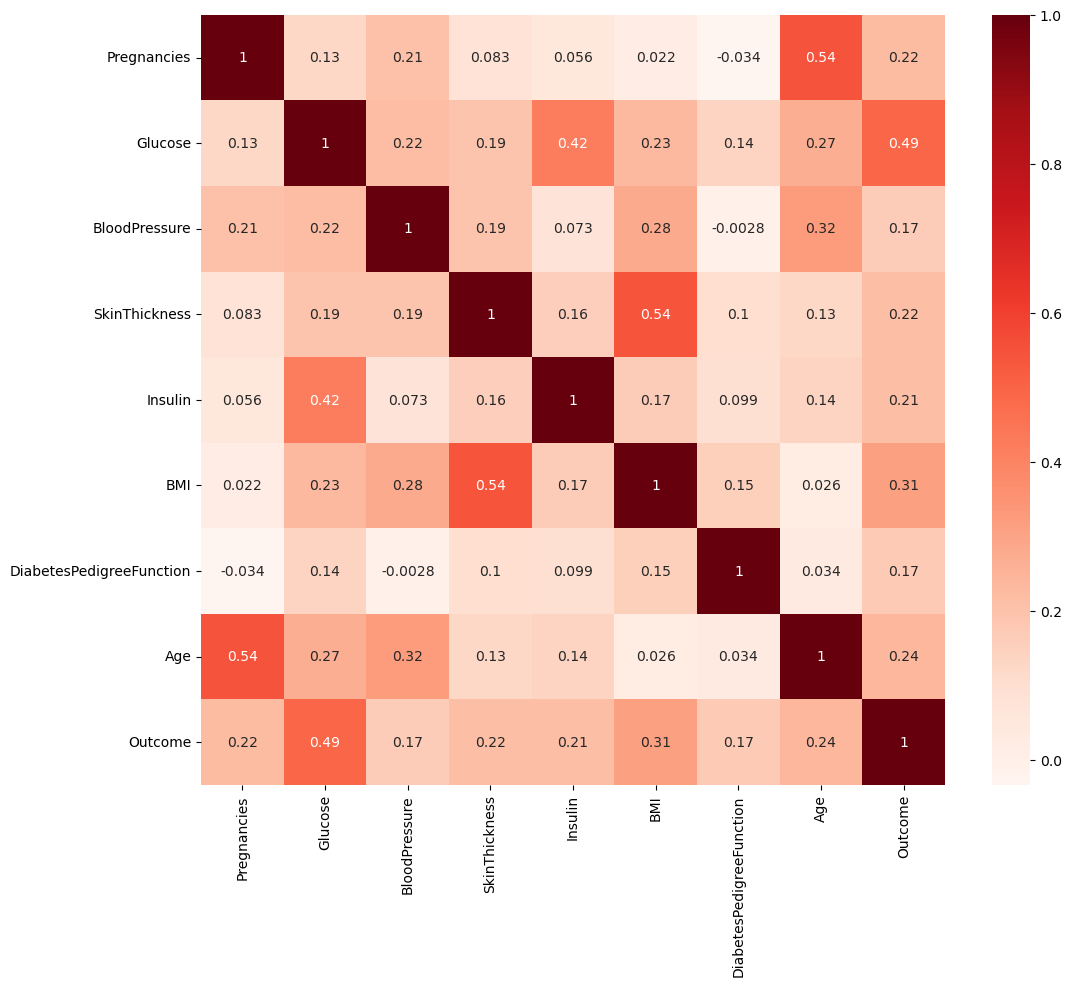

In [6]:
# Using Pearson Correlation to find most infuential attributes
print("Pearson Correlation Matrix")
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From above Heatmap, We can clearly see the difference in the outcome variabes like Skinthickness and Insulin values got changed after preprocessing.

  <b> Importance of Scaling:  </b>

Taking an example from the source cited below, if our dataset consists of two columns age and income if the age is ranging from 25-80 and income is ranging from 90000-190000, if we use the Euclidean distance metric for our KNN, this will largely impact our classification and have an effect on performance by assigning more weightage to variables with larger magnitudes. Therefore, scaling is very important to get accurate results.
We are scaling the values as shown below. 
Technique used is MinMaxscaler.


Example taken from source -
https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

In [7]:
scaler = MinMaxScaler()
encoded_series = scaler.fit_transform(data.to_numpy())
encoded_series = pd.DataFrame(encoded_series, columns=data.columns)
print(encoded_series)

#We are transforming the data of all the columns to 0-1 scale. After scaling we can see the data is as follows



     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2       0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.170130  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.240798  0.170130  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.170130  0.249489   

     DiabetesPedigreeFunction       Age

After scaling we can see that the correlation heatmap from the above varies with the one shown just above (after scaling) varies a lot. Here the correlation between skin thickness and Insulin varies with others. Those two columns have changed a lot, meaning, all the other columns which were changing with respect to these two columns have changed after the data is scaled.
This will improve our overall results, making this algorithm more efficient.


Glucose    0.492928
BMI        0.311924
Age        0.238356
Name: Outcome, dtype: float64


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

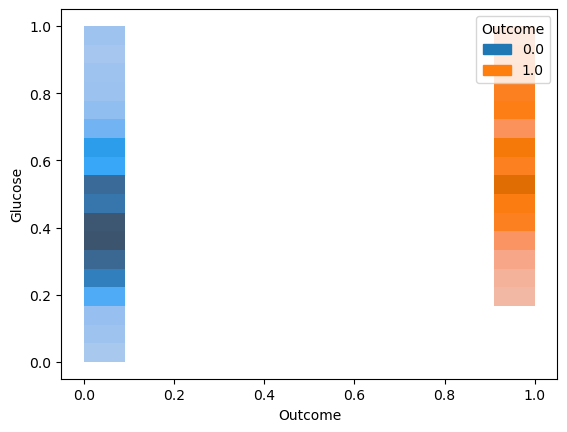

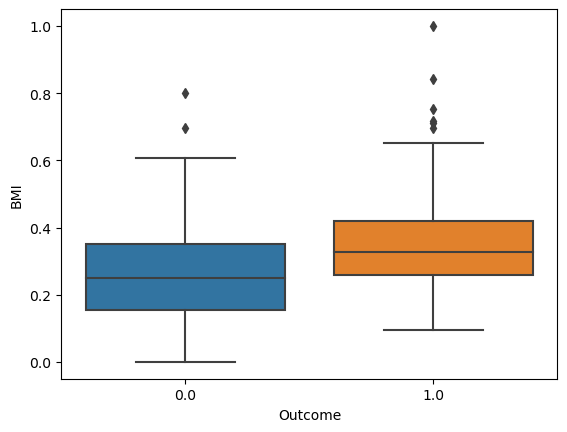

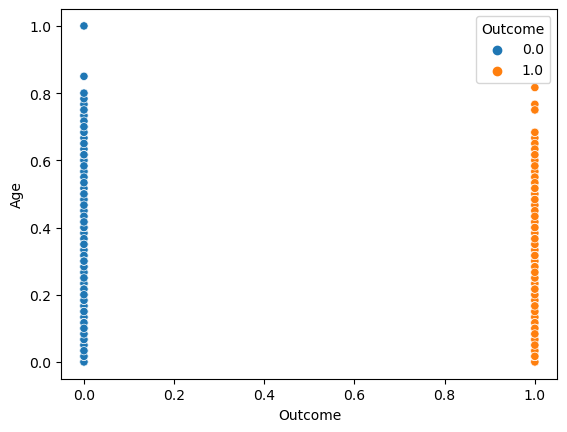

In [8]:
#Correlation with output variable
cor_target = abs(cor["Outcome"])
#printing top 3 correlated features
cor_target = cor_target.sort_values(ascending=False)
cor_target = cor_target.iloc[1:4]
print(cor_target)

plt.figure()
sns.histplot(encoded_series, x="Outcome", y=cor_target.index[0],hue="Outcome")

plt.figure()
sns.boxplot(data=encoded_series,x="Outcome", y=cor_target.index[1])

plt.figure()
sns.scatterplot(data=encoded_series, x="Outcome", y=cor_target.index[2], hue="Outcome")

<b> Histogram plot:</b> The plot shows the distribution of the feature 'Glucose', which has the highest correlation with the outcome variable 'Outcome'. The plot is split by outcome class (0 or 1), with different colors representing each class. The histogram shows that there are more cases of outcome = 1 for higher values of Glucose. The plot suggests that Glucose could be a useful predictor for the outcome variable, as there appears to be a clear separation between the two classes. The plot could be improved by adjusting the bin size and/or using a different visualization technique, such as a kernel density estimate.<b> Box plot: </b>The plot shows the distribution of the feature 'BMI', which has the second-highest correlation with the outcome variable 'Outcome'. The plot is split by outcome class (0 or 1), with different colors representing each class. The box plot shows that the median value of BMI is higher for outcome = 1 compared to outcome = 0. The plot suggests that BMI could be a useful predictor for the outcome variable, as there appears to be a difference in the median value between the two classes. The plot could be improved by adding labels and adjusting the range of the y-axis to better visualize the differences between the two classes. <b>Scatter plot:</b> The plot shows the relationship between the feature 'Age' and the outcome variable 'Outcome'. The plot is split by outcome class (0 or 1), with different colors representing each class. The scatter plot shows that there is a tendency for outcome = 1 to occur at higher ages. The plot suggests that age could be a useful predictor for the outcome variable, although the relationship is not as clear as for the other two features. The plot could be improved by adjusting the markers and/or using a different visualization technique, such as a density plot.

In [9]:
# Separate array into input and output components
X = encoded_series.iloc[:, encoded_series.columns.isin(cor_target.keys())]
y = encoded_series['Outcome']

#Spliting dataset 
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)

# Cross validation score
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores:", cv_scores)



Cross-validation scores: [0.75324675 0.69480519 0.75974026 0.82352941 0.77777778]


C:\Users\16823\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\16823\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\16823\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Elbow method For Optimal k


C:\Users\16823\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\16823\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\16823\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\16823\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

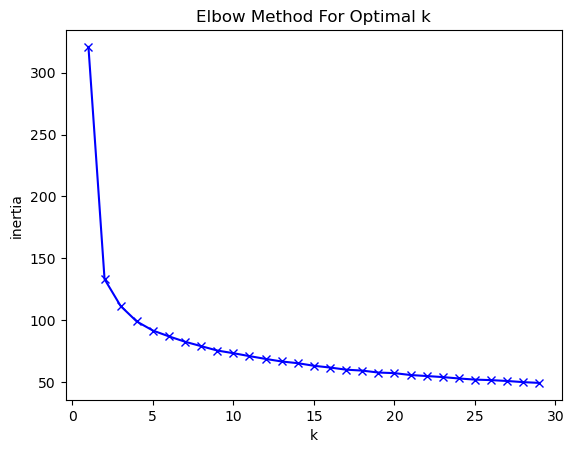

In [10]:
# Elbow Method For Optimal ks
print('Elbow method For Optimal k')

inertia = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k,algorithm="full")
    km = km.fit(encoded_series)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()





This is the Elbow method for the optimal K used to find out the best
neighbor.
We have used three different class labels Glucose, BMI and Age
Here we represented the curve using a blue color.
On X-axis we have k values ranging from 1 to 30.
On Y-axis we have Inertia ranging from 0 to 350
In the curve there is a sudden fall from 350 to 130 and there's a
gradual decrease with slight difference between the K values in the
rest of the curve.
The highest inertia point is 350 at k=2 and the lowest inertia point is
50 at K=29.
The lower the inertia the higher is the K-value.

In [11]:
#Testing with different number of neighbours
error_rate = []
mean_fpr = np.linspace(0,1,100)
tprs = []
aucs = []

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(train_data,train_label)
    predicted = knn.predict(test_data)
    matrix = confusion_matrix(test_label, predicted)
    report = classification_report(test_label, predicted)
    print("Confusion Matrix for n_neighbors=",i,"\n")
    print(matrix)
    print("\nClassification Report for n_neighbors=",i,"\n")
    print(report)
    temp_error_rate = np.mean(predicted != test_label)

    print("Error rate len",len(error_rate))
    if(i == 1 ): 
        error_rate.append(temp_error_rate)

    if((min(error_rate) > temp_error_rate) or (len(error_rate)==1)):
        tprs.clear()
        aucs.clear()
        fpr, tpr, t = roc_curve(test_label, predicted)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    if(i!= 1): 
        error_rate.append(temp_error_rate)



Confusion Matrix for n_neighbors= 1 

[[91 31]
 [30 40]]

Classification Report for n_neighbors= 1 

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       122
         1.0       0.56      0.57      0.57        70

    accuracy                           0.68       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.68      0.68      0.68       192

Error rate len 0
Confusion Matrix for n_neighbors= 2 

[[109  13]
 [ 43  27]]

Classification Report for n_neighbors= 2 

              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80       122
         1.0       0.68      0.39      0.49        70

    accuracy                           0.71       192
   macro avg       0.70      0.64      0.64       192
weighted avg       0.70      0.71      0.68       192

Error rate len 1
Confusion Matrix for n_neighbors= 3 

[[94 28]
 [24 46]]

Classification Report for n_neighbors= 3 

     

C:\Users\16823\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\16823\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

  <b> Explain what your criteria were for selecting the three attributes. What other 3 attributes can you choose?   </b>

Using Pearson's correlation method, we can see that the three columns which have a high correlation with the outcome column are “Glucose”, “BMI” and “Age”. So, we choose these attributes.

  <b> Visualizations of the target variable w.r.t three most significant attributes in a 2D projection and write your observations in 4 - 5 lines.  </b>

Here we are plotting the graph for accuracy and accuracy rate for k. We get the k values by running the values through the training and test values ranging from 0 10 30. 

ROC for best k i.e k= 4 with error rate: 0.265625


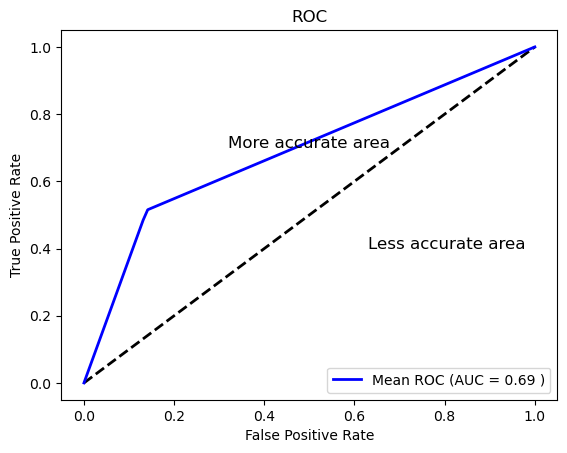

In [12]:

#Plotting ROC Curve 
print("ROC for best k i.e k=",(error_rate.index(min(error_rate))+1),"with error rate:",min(error_rate))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()





Here we have taken 4 values for k, k= 1,2,3,4
The second graph is the ROC curve - classifier in 2D projection.
On X-axis it shows a False Positive rate (Positive label:1)
On Y-axis it shows a True Positive rate (Positive label:1)
Comparing the results, we have calculated the rates from K=1 to K=4 from which we can say that the Highest accuracy is 0.77 at K=4
Also we can see that the minimum error: - 0.234375 is at K = 4


Minimum error:- 0.265625 at K = 4


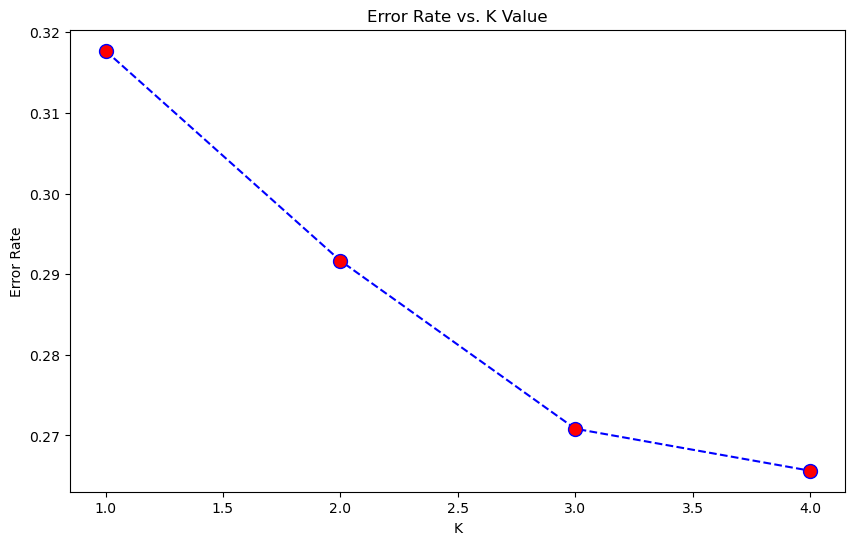

In [13]:
# Plotting Error rate vs K-value 
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

<b> References </b>: 
Pulkit Sharma(Aug 25, 2019)Machine Learning in Python [Article]. https://scikitlearn.org/stable/modules/neighbors.html#:~:text=Supervised%20neighbors%2Dbased%20learning%20comes,predict%20the%20label%20from%20these
What is the k-nearest neighbors algorithm?  [Article]
https://www.ibm.com/topics/knn#:~:text=What%20is%20the%20k%2Dnearest%20neighbors%20algorithm%3F,-Learn%20about%20the&text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point
Ajitesh Kumar,What is Correlation Heatmap?  [Article]
https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/#:~:text=with%20each%20other.-,What%20is%20Correlation%20Heatmap%3F,the%20strength%20of%20this%20relationship
k-nearest neighbors algorithm  [Article]
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
Why is scaling required in KNN and K-Means  [Article]
https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

